<a href="https://colab.research.google.com/github/ethanmacrae/load-shortfall-regression-predict-api/blob/master/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

### Introduction

As the global energy production shifts toward favouring the use of renewable energy sources, several issues have begun to arise. Renewable sources of energy are often impacted by weather conditions, which may lead to a shortfall of elecricity supply. As a result, it becomes imperative to predict these shortfall occurences as to allow for adequate preparation. This preparation often involves supplementing the electricity grid with standard fossil fuel sources. It is also incredibly important in our journey to further our understanding of renewable energy sources as a primary source of electricity as we move into a greener future. 

We have used data from Spains' electricity monitoring program, which tracks the shortfall between the energy generated by means of fossil fuels and various renewable sources with respect to weather conditions. We have sought to develop a prediction model which attempts to predict the shortfall of electricity (our target variable) based on the weather conditions provided in the dataset.  




 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [ ]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building

# Import the scaling module
from sklearn.preprocessing import StandardScaler
# Import train/test split module
from sklearn.model_selection import train_test_split

# Setting global constants to ensure notebook results are reproducible
### PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [ ]:
df_original = pd.read_csv("df_train.csv")

In [ ]:
df = df_original

In [ ]:
pd.set_option('display.max_columns', None)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
⚡ Description: Exploratory data analysis ⚡

This section provides an indepth EDA which allowed us to gain deeper insights into the dimensions and many features of our data. We also provide the code for imputations and cleaning - this was done before any analysis as to prevent missing data and data type clashes from hindering our analysis.  

---


In [ ]:
df.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1012.737165,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


Looking at the top five rows of our data we can see all our features as well as the types of data we are working with.

Our features are:
   - Madrid_wind_speed
   - Valencia_wind_deg
   - Bilbao_rain_1h
   - Valencia_wind_speed
   - Seville_humidity
   - Madrid_humidity
   - Bilbao_clouds_all
   - Bilbao_wind_speed
   - Seville_clouds_all
   - Bilbao_wind_deg
   - Barcelona_wind_speed
   - Barcelona_wind_deg
   - Madrid_clouds_all
   - Seville_wind_speed
   - Barcelona_rain_1h
   - Seville_pressure
   - Seville_rain_1h
   - Bilbao_snow_3h
   - Barcelona_pressure
   - Seville_rain_3h
   - Madrid_rain_1h
   - Barcelona_rain_3h
   - Valencia_snow_3h
   - Madrid_weather_id
   - Barcelona_weather_id
   - Bilbao_pressure
   - Seville_weather_id
   - Valencia_pressure
   - Seville_temp_max
   - Madrid_pressure
   - Valencia_temp_max
   - Valencia_temp
   - Bilbao_weather_id
   - Seville_temp
   - Valencia_humidity
   - Valencia_temp_min
   - Barcelona_temp_max
   - Madrid_temp_max
   - Barcelona_temp
   - Bilbao_temp_min
   - Bilbao_temp
   - Barcelona_temp_min
   - Bilbao_temp_max
   - Seville_temp_min
   - Madrid_temp
   - Madrid_temp_min
   - load_shortfall_3h'


### Cleaning

#### Updating Data types and imputing

In [ ]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [ ]:
### Convert time column to datetime
df['time']= pd.to_datetime(df['time'])


In [ ]:
### Set time as index
df = df.set_index('time') 


In [ ]:
### Drop useless column

df.drop('Unnamed: 0', axis=1, inplace = True)

In [ ]:
### Fill NA's with mean of average of month that NA value lies - more accurate than using overall mean

df.fillna(df.groupby(df.index.month).transform('mean'), inplace = True)


In [ ]:
# look at data statistics
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.0,2920.000000,2920.000000,2920.000000,2920.000000,2920.0,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,2.518094,178.979452,24.255822,2.657192,0.047397,0.046164,0.0,1015.317123,0.000001,0.059863,0.000006,0.0,758.820101,760.473307,1016.709132,772.226294,1013.548597,291.589360,1016.240411,291.439216,291.377796,737.039079,290.746255,64.623916,291.317184,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,1.625507,86.976503,29.430257,1.788870,0.162474,0.193432,0.0,7.021445,0.000074,0.193218,0.000217,0.0,93.536025,98.009846,8.773784,75.727539,6.153739,7.521748,9.624074,7.055448,7.113243,106.129916,7.738131,18.355766,7.176955,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,988.333333,0.000000,0.000000,0.000000,0.0,262.500000,207.333333,975.000000,259.500000,973.000000,273.816667,943.000000,273.816667,273.816667,207.666667,272.350000,13.000000,273.816667,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,1.333333,113.333333,0.000000,1.333333,0.000000,0.000000,0.0,1012.000000,0.000000,0.000000,0.000000,0.0,800.000000,800.000000,1013.333333,800.000000,1011.333333,286.150000,1013.666667,286.150000,285.816667,702.000000,285.356667,52.000000,285.816667,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,2.000000,176.666667,11.333333,2.333333,0.000000,0.000000,0.0,1016.000000,0.000000,0.000000,0.000000,0.0,800.000000,800.000000,1017.666667,800.000000,1014.666667,290.483333,1017.333333,291.150000,291.150000,800.000000,289.540000,65.000000,291.150000,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,3.666667,253.333333,40.000000,3.666667,0.000000,0.000000,0.0,1019.333333,0.000000,0.000000,0.000000,0.0,800.666667,801.000000,1022.000000,800.333333,1018.000000,296.483333,1021.333333,297.150000,297.150000,802.000000,295.674167,79.333333,297.150000,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000
max,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,36

In [ ]:
df.skew()

Madrid_wind_speed        1.494269
Bilbao_rain_1h           3.404307
Valencia_wind_speed      1.328872
Seville_humidity        -0.508637
Madrid_humidity         -0.135537
Bilbao_clouds_all       -0.124933
Bilbao_wind_speed        1.381876
Seville_clouds_all       1.628723
Bilbao_wind_deg          0.322569
Barcelona_wind_speed     1.080200
Barcelona_wind_deg      -0.029036
Madrid_clouds_all        0.925034
Seville_wind_speed       1.346297
Barcelona_rain_1h        5.989675
Seville_rain_1h          6.269205
Bilbao_snow_3h           0.000000
Barcelona_pressure      -0.572509
Seville_rain_3h         54.037024
Madrid_rain_1h           5.211963
Barcelona_rain_3h       40.017330
Valencia_snow_3h         0.000000
Madrid_weather_id       -2.439600
Barcelona_weather_id    -2.577583
Bilbao_pressure         -0.952458
Seville_weather_id      -3.103741
Valencia_pressure       -1.954369
Seville_temp_max         0.473503
Madrid_pressure         -2.608926
Valencia_temp_max        0.019499
Valencia_temp 

In [ ]:
df.kurtosis()

Madrid_wind_speed          2.567383
Bilbao_rain_1h            16.905396
Valencia_wind_speed        2.100244
Seville_humidity          -0.710306
Madrid_humidity           -1.134569
Bilbao_clouds_all         -1.488942
Bilbao_wind_speed          2.306390
Seville_clouds_all         1.417797
Bilbao_wind_deg           -1.017392
Barcelona_wind_speed       1.410571
Barcelona_wind_deg        -0.956300
Madrid_clouds_all         -0.566527
Seville_wind_speed         2.369604
Barcelona_rain_1h         52.069367
Seville_rain_1h           48.243445
Bilbao_snow_3h             0.000000
Barcelona_pressure         1.175366
Seville_rain_3h         2920.000000
Madrid_rain_1h            41.250278
Barcelona_rain_3h       1642.238858
Valencia_snow_3h           0.000000
Madrid_weather_id          5.349404
Barcelona_weather_id       6.056749
Bilbao_pressure            1.866927
Seville_weather_id         9.557456
Valencia_pressure          6.038467
Seville_temp_max          -0.259161
Madrid_pressure           14

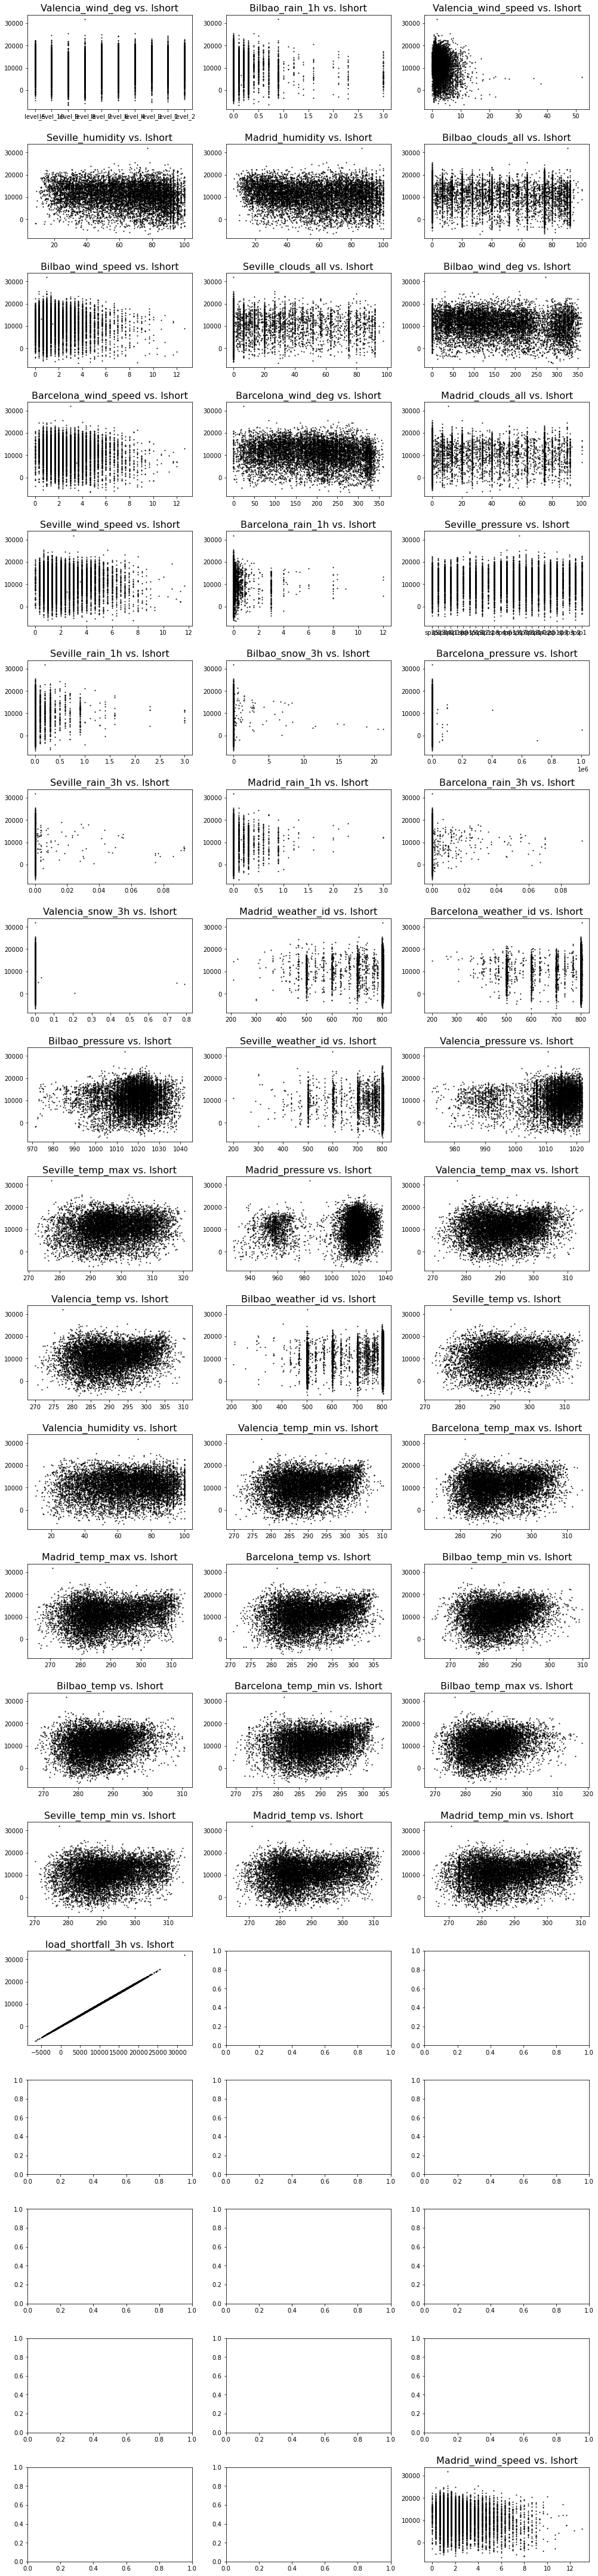

In [ ]:
# plot relevant feature interactions
fig, axs = plt.subplots(20,3, figsize=(14,60),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. lshort".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['load_shortfall_3h'], s=1, color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

In [ ]:
# evaluate correlation
df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157583,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.203164,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.053338,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.059663,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.124726,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.076527,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,-0.018225,0.239326,0.213420,-0.026640,0.073080,-0.001642,0.009572,-0.026037,0.088502,-0.038246,-0.008114,-0.101497,-0.003074,-0.122915,-0.086691,0.041561,0.103342,0.075541,0.091352,0.093919,-0.031661,0.080357,-0.279825,0.093177,0.011151,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,-0.0

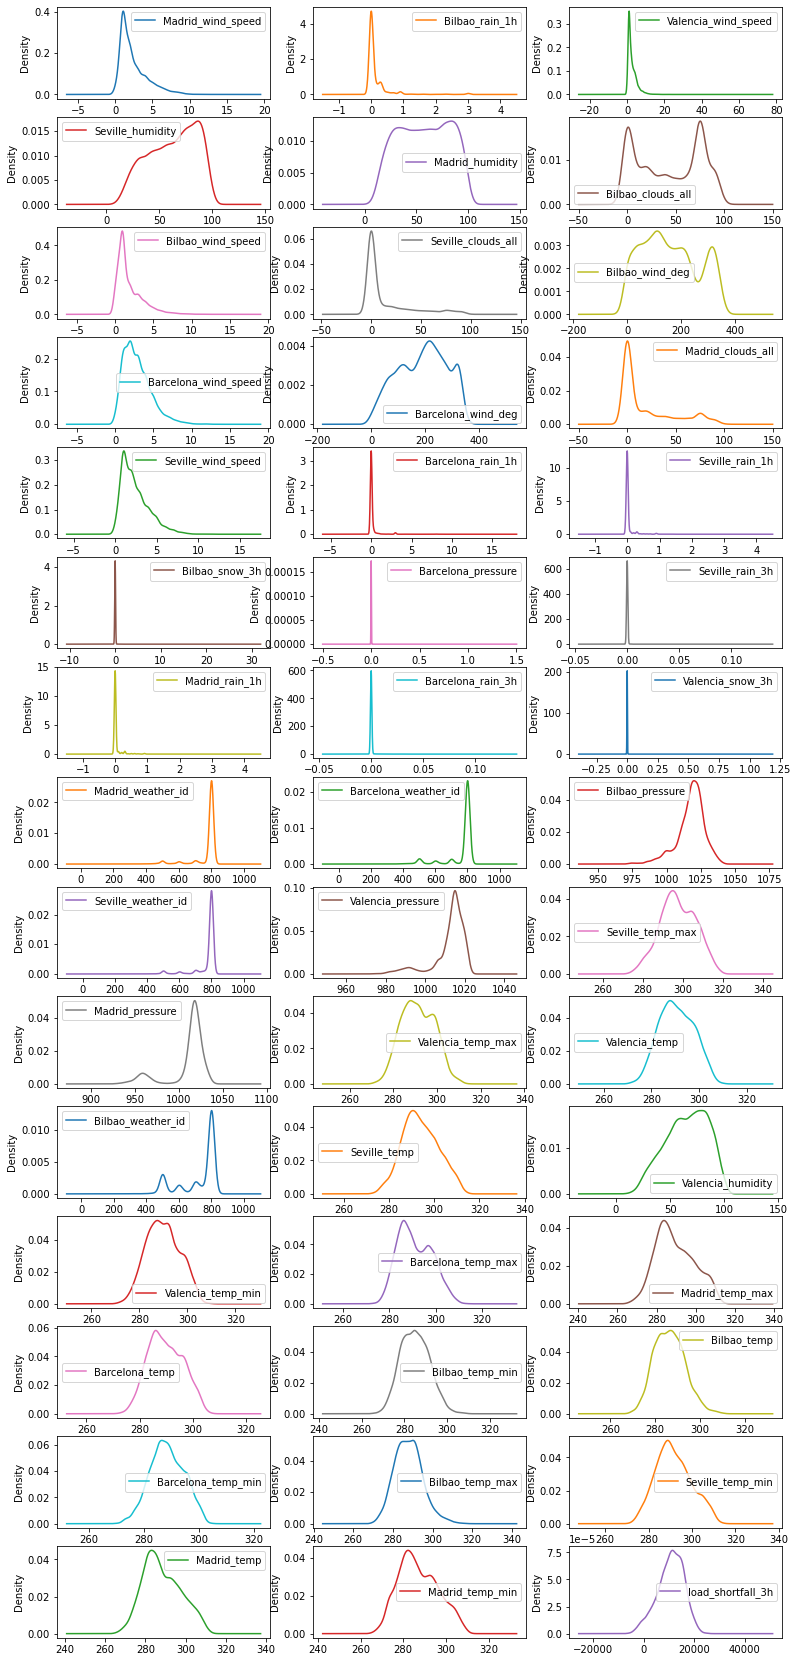

In [ ]:
# have a look at feature distributions
features = df.columns
df[features].plot(kind='density', subplots=True, layout=(15, 3), sharex=False, figsize=(13, 30));

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features
df.drop(columns = ['Valencia_wind_deg', 'Seville_pressure'], inplace = True)

In [ ]:
# create new features

In [ ]:
# engineer existing features

In [ ]:
# scaling the variables

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data


In [ ]:
# create targets and features dataset
# Separate the features from the response
y = df['load_shortfall_3h']
X = df.drop(['load_shortfall_3h'], axis=1)

In [ ]:
# Save standardized features into new variable
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [ ]:
# create one or more ML models
# Import LASSO module
from sklearn.linear_model import Lasso

# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

# Train the LASSO model
lasso.fit(X_train, y_train)


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80659673510.21722, tolerance: 18634441.993152138
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [ ]:
# Import Ridge regression model
from sklearn.linear_model import Ridge

# Create ridge model
ridge = Ridge()

# Train the model
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
#import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5
RF = RandomForestRegressor(n_estimators=30, max_depth=5)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=30)

In [ ]:
#import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=3,random_state=42)
regr_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
# evaluate one or more ML models

# Make training set predictions for each model
train_lasso = lasso.predict(X_train)
test_lasso = lasso.predict(X_test)

train_ridge = ridge.predict(X_train)
test_ridge = ridge.predict(X_test)

train_forest = RF.predict(X_train)
test_forest = RF.predict(X_test)


train_tree = regr_tree.predict(X_train)
test_tree = regr_tree.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance
from sklearn import metrics

# Dictionary of results
results_dict = {'Training RMSE':
                    {
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso, squared=False), 
                        "RIDGE": metrics.mean_squared_error(y_train, train_ridge, squared=False),
                        "FOREST": metrics.mean_squared_error(y_train, train_forest, squared=False),
                        "D_TREE": metrics.mean_squared_error(y_train, train_tree, squared=False)
                    },
                    'Test RMSE':
                    {
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso, squared=False),
                        "RIDGE": metrics.mean_squared_error(y_test, test_ridge, squared=False),
                        "FOREST": metrics.mean_squared_error(y_test, test_forest, squared=False),
                        "D_TREE": metrics.mean_squared_error(y_test, test_tree, squared=False)
                    }
                }

In [ ]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
# View the results
results_df

,Training RMSE,Test RMSE
LASSO,4823.868238,4832.796201
RIDGE,4823.771799,4830.753338
FOREST,4642.673285,5144.354069
D_TREE,4939.259066,5253.834173


Considering the Test Root Mean Squared Error is lowest for the Ridge Regression model, it makes the most sense that this model should be used as in our shortfall predictions on unseen data. 


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic